In [47]:
import os 
import pandas as pd 
import numpy as np 
from sklearn.decomposition import TruncatedSVD

pheno_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/JULY29'

In [76]:
def get_dfs(popname):
    df = pd.read_csv(os.path.join(pheno_dir, 'df_raw_%s.csv'%popname),index_col = 0).sort_values('Age')
    
    # Binarize Gender 
    df['Gender']  = df['Gender'].map({'F': 1, 'M': 0})
    
    # Take PCA of quality metrics 
    pca = TruncatedSVD(n_components=1)
    qc_metrics = ['EFC_MAG', 'FWHM_MAG', 'QI1_MAG',  'SNR_MAG', 'CNR_MAG', 'FBER_MAG' ]
    pca.fit(np.array(np.asarray([df[qc] for qc in qc_metrics])))
    df['QC_PCA'] = pca.components_[0,:]
                  
    pca2 = TruncatedSVD(n_components=1)
    chi_metrics  =['Caud', 'Puta', 'Thal', 'SN', 'STN', 'RN','Pall']
    pca2.fit(np.array(np.asarray([df[chi] for chi in chi_metrics])))
    df['Chi_PCA'] = pca2.components_[0,:]              
                  
    # Calc striatal daa 
    for subject in df.index:
        df.ix[subject, 'Caud_Puta'] = (df.loc['%s' %subject]['Caud'] +
                                        df.loc['%s' % subject]['Puta']) / 2.
    
    df.to_csv(os.path.join(pheno_dir, 'df_proc_%s.csv'%popname))
    
    return df 
df_controls = get_dfs('controls')
df_lemon    = get_dfs('lemon')
df_patients = get_dfs('patients')


df_controls = pd.concat((df_controls,df_lemon), axis=0)


In [83]:
controls_matched = [
    #MATCH 1 
    'SMVX', 'HM1X', 'STQT', 'LEMON222', 'FA2T', 'LEMON119', 'LEMON155', 'PAHT', 'LEMON144'#'SS1X', 
    'GSNT', 'LEMON223', 'LEMON120', 'LEMON149', 'KO4T', 'HM2X', 'MJBT', 'SDCT', 'EC9T', 
    'RA7T', 'GHAT', 'PU2T', 'TJ5T', 'BH5T', 'LMIT', 'GSAT', 'TV1T', 'RMNT', 'LEMON124', 'LEMON179'
    #MATCH 2
    'LEMON179', 'LEMON121', 'TR4T', 'LEMON134', 'LEMON196', 'LEMON209', 'LEMON215', 'LEMON178', 
    'LEMON202',
    'LEMON117', 'LEMON116',
    
    #'LEMON141','LEMON208','LEMON210','LEMON185','LEMON198','SC1T','LL5T'   
                  ]

In [84]:
controls_non_matched = [subject for subject in df_controls.index if subject not in controls_matched] 

print 'Total Controls = ', len(df_controls.index)
print 'Matched Controls = ', len(controls_matched)
print 'Non-Matched Controls = ', len(controls_non_matched)
print 'Total Patients = ', len(df_patients)


Total Controls =  127
Matched Controls =  38
Non-Matched Controls =  91
Total Patients =  28


In [85]:
df_controls_matched = df_controls.drop(controls_non_matched, axis = 0)

In [86]:
df_controls_matched.sort('Age').to_csv(os.path.join(pheno_dir, 'controls_matched.csv'))
df_patients.sort_values('Age').to_csv(os.path.join(pheno_dir, 'patients_matched.csv'))

/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [87]:
df_controls_matched

,Age,Gender,Group,SNR_UNI,CNR_UNI,FBER_UNI,EFC_UNI,FWHM_UNI,QI1_UNI,SNR_MAG,...,Accu,Thal,SN,RN,STN,BG,BS,QC_PCA,Chi_PCA,Caud_Puta
SMVX,19,0,Controls,2.002983,1.488013,-1.411093,NaN,3.38438,0.208615,-0.472459,...,6.2350,-14.5220,115.5335,59.6445,53.1690,24.3325,76.115667,0.177394,0.157930,13.32925
STQT,23,0,Controls,2.048253,1.427937,-0.921817,NaN,3.49283,0.189560,0.682875,...,-20.9185,-25.4320,111.9350,99.9740,58.1665,21.0275,90.025167,0.194451,0.185565,11.22100
HM1X,23,0,Controls,1.852307,1.381380,-2.762143,NaN,3.61233,0.207247,0.346384,...,-8.3780,-29.5085,152.3955,37.6510,88.8390,15.0820,92.961833,0.207636,0.185448,1.29975
TR4T,24,1,Controls,2.008357,1.437652,-1.440937,NaN,3.38434,0.216562,-0.050296,...,-38.4025,-40.5495,132.5600,114.2240,84.6485,16.9190,110.477500,0.183429,0.201731,14.88375
FA2T,27,0,Controls,2.068135,1.414485,-0.808499,NaN,3.48039,0.170172,0.555399,...,-23.6820,-42.3650,127.4680,102.4125,68.2350,20.6875,99.371833,0.224572,0.196976,9.09375
PAHT,29,0,Controls,2.080124,1.475132,0.493567,NaN,3.40004,0.224457,-0.159644,...,3.6360,-7.5695,110.9765,85.9645,46.1760,24.2395,81.039000,0.170940,0.164988,14.97575
KO4T,41,0,Controls,1.959658,1.200225,-4.929170,NaN,3.60105,0.216497,0.341096,...,-14.6035,-28.4445,109.3885,167.4300,107.4930,26.8935,128.103833,0.188349,0.230582,18.85825
HM2X,42,0,Controls,2.068944,1.325327,-1.500313,NaN,3.37259,0.249849,0.923278,...,-13.8990,-27.4975,133.7565,157.3355,76.4795,23.1355,122.523833,0.174540,0.217637,18.45925
SDCT,42,1,Controls,2.002125,1.301432,-2.672053,NaN,3.80298,0.210966,-0.550633,...,-1.5525,-38.7465,130.0375,123.7245,66.4685,12.2175,106.743500,0.198311,0.187746,7.02700
MJBT,44,0,Controls,1.914781,1.255828,-2.801751,NaN,3.61848,0.266036,-0.397035,...,-16.0945,-32.2945,136.1955,138.1730,123.1990,25.1050,132.522500,0.181254,0.231698,17.02125


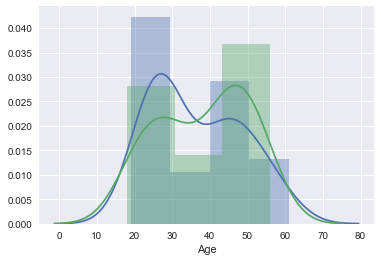

In [88]:
%matplotlib inline
import seaborn as sns 
sns.distplot(df_controls_matched.Age)
sns.distplot(df_patients.Age)